In [1]:
# Загрузка датасета с Кеггла
!pip install kaggle -q
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install --upgrade --force-reinstall --no-deps kaggle==1.5.12 -q
!kaggle --version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 997.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Kaggle API 1.5.12


# Загрузка данных

In [3]:
!kaggle datasets download -d thedevastator/south-park-scripts-dataset
!unzip '/content/south-park-scripts-dataset.zip' -d'/content/data'

  0% 0.00/3.70M [00:00<?, ?B/s]
100% 3.70M/3.70M [00:00<00:00, 198MB/s]
Archive:  /content/south-park-scripts-dataset.zip
  inflating: /content/data/All-seasons.csv  
  inflating: /content/data/Season-1.csv  
  inflating: /content/data/Season-10.csv  
  inflating: /content/data/Season-11.csv  
  inflating: /content/data/Season-12.csv  
  inflating: /content/data/Season-13.csv  
  inflating: /content/data/Season-14.csv  
  inflating: /content/data/Season-15.csv  
  inflating: /content/data/Season-16.csv  
  inflating: /content/data/Season-17.csv  
  inflating: /content/data/Season-18.csv  
  inflating: /content/data/Season-19.csv  
  inflating: /content/data/Season-2.csv  
  inflating: /content/data/Season-3.csv  
  inflating: /content/data/Season-4.csv  
  inflating: /content/data/Season-5.csv  
  inflating: /content/data/Season-6.csv  
  inflating: /content/data/Season-7.csv  
  inflating: /content/data/Season-8.csv  
  inflating: /content/data/Season-9.csv  


In [4]:
import numpy as np
import pandas as pd

In [5]:
df_main = pd.read_csv('/content/data/All-seasons.csv')
df_main['Line'] = df_main['Line'].apply(lambda x: x.replace("\n",""))
df_main.head(20)

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away."
1,10,1,Kyle,Going away? For how long?
2,10,1,Stan,Forever.
3,10,1,Chef,I'm sorry boys.
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."
5,10,1,Chef,Wow!
6,10,1,Mrs. Garrison,Chef?? What kind of questions do you think adv...
7,10,1,Chef,What's the meaning of life? Why are we here?
8,10,1,Mrs. Garrison,I hope you're making the right choice.
9,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...


<Axes: >

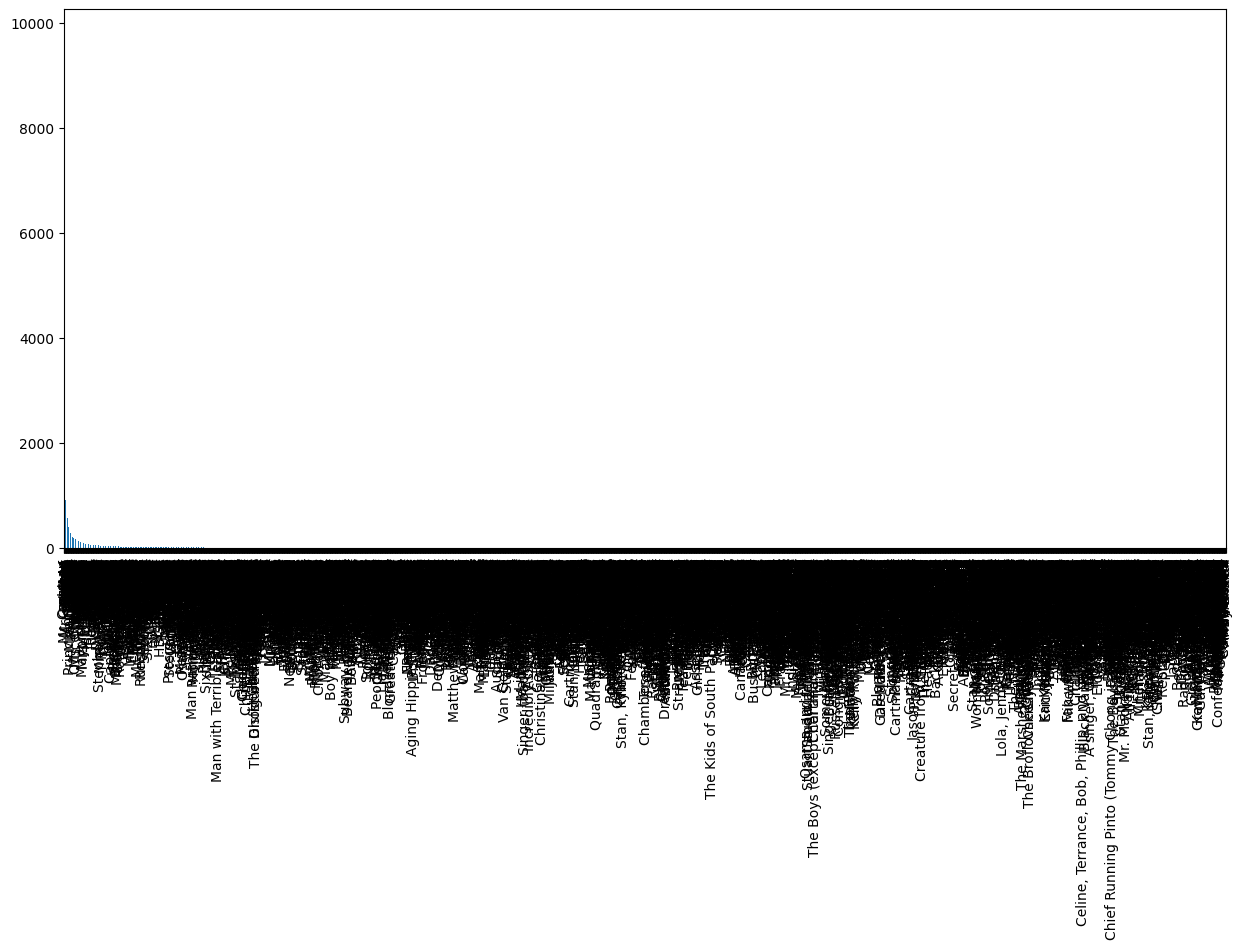

In [6]:
df_main.Character.value_counts().plot.bar(figsize=(15,7))

In [7]:
LEVEL_TALK = 50
main_characters = df_main.Character.value_counts()[df_main.Character.value_counts()>LEVEL_TALK].index
main_characters

Index(['Cartman', 'Stan', 'Kyle', 'Butters', 'Randy', 'Mr. Garrison', 'Chef',
       'Kenny', 'Sharon', 'Mr. Mackey',
       ...
       'Dr. Chinstrap', 'Officer', 'Mr. Hat', 'Mingie', 'Coach', 'Larry',
       'Stephen Abootman', 'Stan, Kyle', 'Ms. Ellen', 'Rob Reiner'],
      dtype='object', length=127)

In [8]:
# filter rows based on list values
mask = df_main['Character'].isin(main_characters)
sep_df = df_main[mask]
sep_df

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away."
1,10,1,Kyle,Going away? For how long?
2,10,1,Stan,Forever.
3,10,1,Chef,I'm sorry boys.
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."
...,...,...,...,...
70891,9,14,Stan,I think you're pushing it.
70892,9,14,Randy,How about twenty?
70893,9,14,Stan,That's not disciprine.
70894,9,14,Randy,Right right. Does vodka count?


<Axes: >

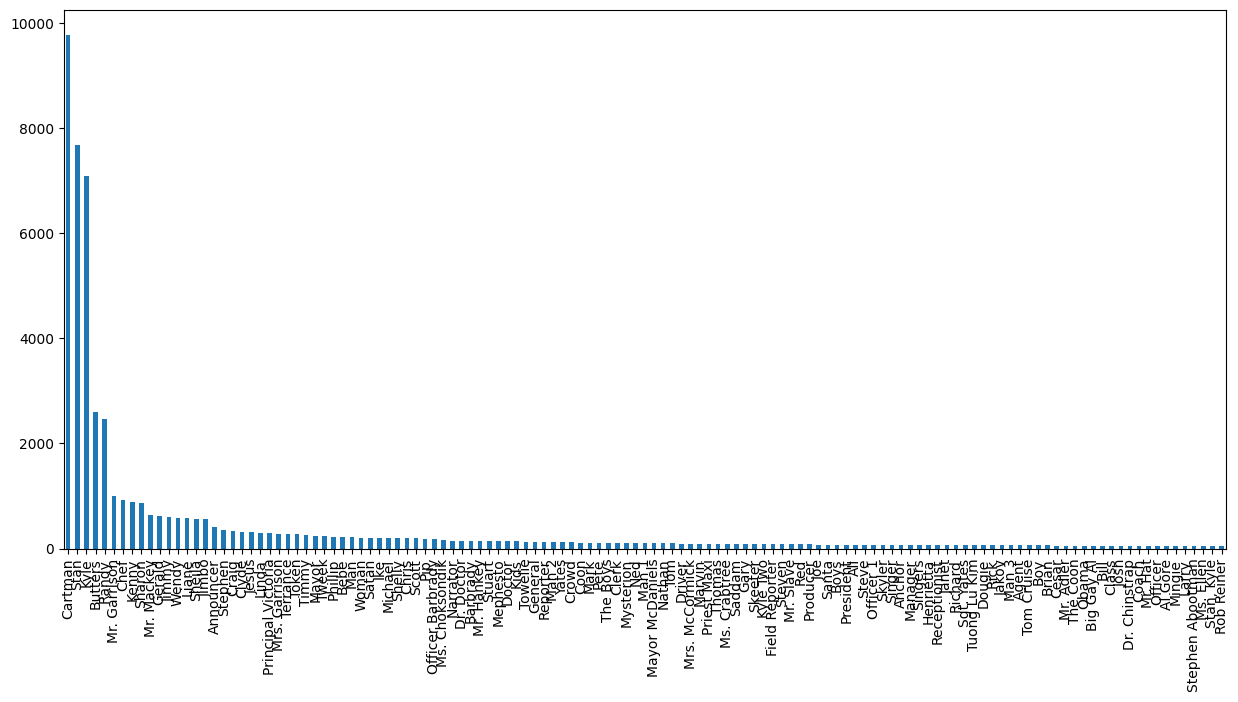

In [9]:
sep_df.Character.value_counts().plot.bar(figsize=(15,7))

Сделаем смещенную колонку от Charter  чтобы выявить и убрать строке с повторяющимся  Charter , оставивь последний

In [10]:
sep_df['repeat'] = sep_df['Character'].shift(-1)
sep_df

<ipython-input-10-b76c6030fd39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sep_df['repeat'] = sep_df['Character'].shift(-1)


,Season,Episode,Character,Line,repeat
0,10,1,Stan,"You guys, you guys! Chef is going away.",Kyle
1,10,1,Kyle,Going away? For how long?,Stan
2,10,1,Stan,Forever.,Chef
3,10,1,Chef,I'm sorry boys.,Stan
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",Chef
...,...,...,...,...,...
70891,9,14,Stan,I think you're pushing it.,Randy
70892,9,14,Randy,How about twenty?,Stan
70893,9,14,Stan,That's not disciprine.,Randy
70894,9,14,Randy,Right right. Does vodka count?,Stan


In [11]:
mask = sep_df['repeat'] == sep_df['Character']
sep_df = sep_df[~mask]
sep_df.reset_index(drop= True , inplace= True )
sep_df

,Season,Episode,Character,Line,repeat
0,10,1,Stan,"You guys, you guys! Chef is going away.",Kyle
1,10,1,Kyle,Going away? For how long?,Stan
2,10,1,Stan,Forever.,Chef
3,10,1,Chef,I'm sorry boys.,Stan
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",Chef
...,...,...,...,...,...
44050,9,14,Stan,I think you're pushing it.,Randy
44051,9,14,Randy,How about twenty?,Stan
44052,9,14,Stan,That's not disciprine.,Randy
44053,9,14,Randy,Right right. Does vodka count?,Stan


No charts were generated by quickchart


# from seminar

#TF-IDF векторизатор

In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
nltk.download('stopwords')

from nltk.corpus import stopwords
eng_stopwords = stopwords.words("english")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
tokenized_sentences = sep_df['Line'].apply(wordpunct_tokenize)
len(tokenized_sentences)

44055

## Initailize TfidfVectorizer

Инициализируйте TfidfVectorizer с ограничением размера словаря любым значением до 30000, игнорированием русских стоп-слов и использованием заданного токенизатора.

In [15]:
# vectorizer
vectorizer = TfidfVectorizer(stop_words=eng_stopwords,
                             ngram_range=(1,3),
                             max_features=5024,
                             tokenizer=wordpunct_tokenize)

In [16]:
matrix_tfidf = vectorizer.fit_transform(sep_df['Character'])
print(matrix_tfidf.shape)
print(type(matrix_tfidf))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'"] not in stop_words.
  warnings.warn(


(44055, 187)
<class 'scipy.sparse._csr.csr_matrix'>


Берем с семинара класс для поиска лучших на TF-Idf, дополнив его посиском случайных из не вошедших лучших

In [17]:
class SimpleSearchEngine:
    def __init__(self, text_database: list[str], top_k: int):
        self.raw_procesed_data = [self.preprocess(sample) for sample in text_database]
        self.base = []
        self.retriever = None
        self.inverted_index = {}
        self._init_retriever(text_database)
        self._init_inverted_index(text_database)
        self.top_k = top_k

    @staticmethod
    def preprocess(sentence: str) -> str:
        return sentence

    def _init_retriever(self, text_database: list[str]):
        """
        TfidfVectorizer is used to convert a collection of raw documents into a
        matrix of TF-IDF features.
        Use fit_transform method of TfidfVectorizer to learn the vocabulary and
        idf from the training set and the transformed matrix.
        """
        self.retriever = TfidfVectorizer(stop_words=eng_stopwords,
                             ngram_range=(2,5),
                             max_features=5024,
                             tokenizer=wordpunct_tokenize)

        self.base = self.retriever.fit_transform(text_database) #train retriever

    def retrieve(self, query: str) -> np.array:
        return self.retriever.transform([query])

    def retrieve_documents(self, query: str, out = "best") -> np.array:
        """
        The query needs to be transformed into the same vector space as your
        document base.
        Utilize cosine_similarity to compute the similarity between the query
        vector and all document vectors in the base.
        Remember that cosine_similarity returns a matrix; you might need to
        flatten it to get a 1D array of similarity scores.
        Sort the documents based on their cosine similarity scores to find k
        most relevant ones to the query and return them as answer.
        """
        query_vector = self.retrieve(query)
        cosine_similarities = cosine_similarity(query_vector, self.base).flatten()
        if out == "best":
           relevant_indices = np.argsort(cosine_similarities, axis=0)[::-1][:self.top_k]
        elif out == "bad":
          relevant_indices = np.argsort(cosine_similarities, axis=0)[::-1][self.top_k:]
          relevant_indices = np.random.choice(relevant_indices, self.top_k, replace=False)
        return relevant_indices

    def _init_inverted_index(self, text_database: list[str]):
        self.inverted_index = dict(enumerate(text_database))

    def display_relevant_docs(self, query: str, full_database, out = "best") -> list[str]:
        docs_indexes = self.retrieve_documents(query, out = out)
        return [self.inverted_index[ind].replace('\n', "") for ind in docs_indexes]


In [18]:
simple_search_engine = SimpleSearchEngine(sep_df['Line'], 3)
query = "What is the best rest?"

best_results = simple_search_engine.display_relevant_docs(query, sep_df['Character'], 'best')
print(f'best_results {best_results}')

bad_results = simple_search_engine.display_relevant_docs(query, sep_df['Character'], 'bad')
print(f'bad_results {bad_results}')

best_results ['Dad!', 'Well, you see Butters, everything worked out.\xa0\xa0"Oh, thank you Eric. I screwed up everything but now everyone\'s happy. Thanks for covering my ass."', 'Oh. Really?']
bad_results ["Let's just get this over with, Cartman. You won the bet, here's ten dollars.", 'Please, girlfriend. You look like some kind of Little Orphan Annie nightmare.', 'Wow! Count me in!']


In [19]:
test_text = 'What is the best rest?'
simple_search_engine = SimpleSearchEngine(sep_df['Line'], 5)
docs = simple_search_engine.retrieve_documents(test_text, 'best')
docs

array([44054, 14680, 14688, 14687, 14686])

# Make dataset

Теперь мы можем собрать новый датасет, собрав туда данные из датафрейма, дополнив их отборами через TF-idf

In [20]:
def window_back(id, win):
    if (id - win)<0:
      win = id
    return win

def window(id, win, top):
    if (id + win)> top:
      win = id
    return win

In [22]:
CON_WIND = 5 # context_window
CLOSE_REP = 4 # close_reply
TOP_K = 3 # top_k

DF_OUT = sep_df[['Season',	'Episode']]

# инициилизируем search_engine на TF-idf
simple_search_engine = SimpleSearchEngine(sep_df['Line'], TOP_K)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'"] not in stop_words.
  warnings.warn(


In [ ]:
# speaker - тот кто говорит первый
DF_OUT['speaker'] = sep_df['Character'].shift(1)

# Что говорит speaker
DF_OUT['query'] = sep_df['Line'].shift(1)

# Собеседники
DF_OUT['companions'] = [sep_df.iloc[id+1:id+1 + window(id, CLOSE_REP, sep_df.shape[0])]['Character'].to_list() for id in sep_df.index]

# Ближайшие реплики собеседников
DF_OUT["close_reply"] = [sep_df.iloc[id+1:id+1 + window(id, CLOSE_REP, sep_df.shape[0])]['Line'].to_list() for id in sep_df.index]

# реплики подобранные на Tf-Idf
DF_OUT["neutral_reply"] = sep_df['Line'].apply(lambda query: simple_search_engine.display_relevant_docs(query, sep_df['Character'], 'best'))

# плохие реплики подобранные на Tf-Idf
DF_OUT["bad_reply"] = sep_df['Line'].apply(lambda query: simple_search_engine.display_relevant_docs(query, sep_df['Character'], 'bad'))

# контекст прошлых реплик разговора
DF_OUT["context"] = ['. '.join(sep_df.iloc[id-window_back(id, CON_WIND):id ]['Line'].to_list()) for id in sep_df.index]

DF_OUT.dropna(inplace=True)


In [32]:
DF_OUT.head(20)

,Season,Episode,speaker,query,companions,close_reply,neutral_reply,bad_reply,context
1,10,1,Stan,"You guys, you guys! Chef is going away.","[Kyle, Stan, Chef, Stan]","[Forever., I'm sorry boys., Chef said he's bee...","[Going away? For how long?, Where away?, Sent ...",[Omigod! You guys... this is the greatest plac...,"You guys, you guys! Chef is going away."
2,10,1,Kyle,Going away? For how long?,"[Stan, Chef, Stan, Chef]","[I'm sorry boys., Chef said he's been bored, s...","[He can't hold it in forever., He can't hold i...",[It's just that there's somebody that I have a...,"You guys, you guys! Chef is going away. . Goin..."
3,10,1,Stan,Forever.,"[Chef, Stan, Chef, Mrs. Garrison]","[Chef said he's been bored, so he joining a gr...","[I'm sorry boys., Hi boys., It was nice compet...","[I saved up enough to buy M-80s this year., Ug...","You guys, you guys! Chef is going away. . Goin..."
4,10,1,Chef,I'm sorry boys.,"[Stan, Chef, Mrs. Garrison, Chef]","[Wow!, Chef?? What kind of questions do you th...","[Chef said he's been bored, so he joining a gr...","[Here he comes! , Tell him, tell him he's... h...","You guys, you guys! Chef is going away. . Goin..."
5,10,1,Stan,"Chef said he's been bored, so he joining a gro...","[Chef, Mrs. Garrison, Chef, Mrs. Garrison]",[Chef?? What kind of questions do you think ad...,"[Wow! A present just for me? , Wow!, Wow!]","[There, what do you think?, How come uh, I can...","You guys, you guys! Chef is going away. . Goin..."
6,10,1,Chef,Wow!,"[Mrs. Garrison, Chef, Mrs. Garrison, Cartman]","[What's the meaning of life? Why are we here?,...","[Dad!, Well, you see Butters, everything worke...","[Oh, okay. Cool. , (Hey, you guys. I'm right h...",Going away? For how long?. Forever.. I'm sorry...
7,10,1,Mrs. Garrison,Chef?? What kind of questions do you think adv...,"[Chef, Mrs. Garrison, Cartman, Stan]","[I hope you're making the right choice., I'm g...","[What? Why?, A new family moved in? Where are ...","[I don't wanna be in your crappy band, guys. I...",Forever.. I'm sorry boys.. Chef said he's been...
8,10,1,Chef,What's the meaning of life? Why are we here?,"[Mrs. Garrison, Cartman, Stan, Mayor McDaniels]",[I'm gonna miss him. I'm gonna miss Chef and ...,"[I hope you're making the right choice., I hop...",[Yeah. There's this Asian kid name Yao. He's a...,"I'm sorry boys.. Chef said he's been bored, so..."
9,10,1,Mrs. Garrison,I hope you're making the right choice.,"[Cartman, Stan, Mayor McDaniels, Jimbo]","[Dude, how are we gonna go on? Chef was our fu...",[I'm gonna miss him. I'm gonna miss Chef and ...,"[Ey, Gerald, maybe after the show we can make ...","Chef said he's been bored, so he joining a gro..."
10,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...,"[Stan, Mayor McDaniels, Jimbo, Gerald]","[And we will all miss you, Chef, but we know ...","[Dude, how are we gonna go on? Chef was our fu...","[In virtual reality, yes you did., Yeah., Aaah! ]",Wow!. Chef?? What kind of questions do you thi...


## Save dataset

In [42]:
dir = "/content/drive/Othercomputers/My_comp/Документы/МФТИ_Наука_о_данных/NLP_generation/DZ/DZ_1/Project/data"
file_name = dir + "/talks_dataset.df"

DF_OUT.to_pickle(file_name)

In [43]:
load_df = pd.read_pickle(file_name)
load_df

,Season,Episode,speaker,query,companions,close_reply,neutral_reply,bad_reply,context
1,10,1,Stan,"You guys, you guys! Chef is going away.","[Kyle, Stan, Chef, Stan]","[Forever., I'm sorry boys., Chef said he's bee...","[Going away? For how long?, Where away?, Sent ...",[Omigod! You guys... this is the greatest plac...,"You guys, you guys! Chef is going away."
2,10,1,Kyle,Going away? For how long?,"[Stan, Chef, Stan, Chef]","[I'm sorry boys., Chef said he's been bored, s...","[He can't hold it in forever., He can't hold i...",[It's just that there's somebody that I have a...,"You guys, you guys! Chef is going away. . Goin..."
3,10,1,Stan,Forever.,"[Chef, Stan, Chef, Mrs. Garrison]","[Chef said he's been bored, so he joining a gr...","[I'm sorry boys., Hi boys., It was nice compet...","[I saved up enough to buy M-80s this year., Ug...","You guys, you guys! Chef is going away. . Goin..."
4,10,1,Chef,I'm sorry boys.,"[Stan, Chef, Mrs. Garrison, Chef]","[Wow!, Chef?? What kind of questions do you th...","[Chef said he's been bored, so he joining a gr...","[Here he comes! , Tell him, tell him he's... h...","You guys, you guys! Chef is going away. . Goin..."
5,10,1,Stan,"Chef said he's been bored, so he joining a gro...","[Chef, Mrs. Garrison, Chef, Mrs. Garrison]",[Chef?? What kind of questions do you think ad...,"[Wow! A present just for me? , Wow!, Wow!]","[There, what do you think?, How come uh, I can...","You guys, you guys! Chef is going away. . Goin..."
...,...,...,...,...,...,...,...,...,...
44050,9,14,Randy,Well how about four?,"[Stan, Randy, Stan, Randy]","[How about twenty?, That's not disciprine., Ri...",[What the hell do you think you're doing keepi...,"[No. Couldn't be. Oh, my God., Oh... Well......","Oh. Well, tell you what: let's leave the car h..."
44051,9,14,Stan,I think you're pushing it.,"[Randy, Stan, Randy, Stan]","[That's not disciprine., Right right. Does vod...","[Dad!, Well, you see Butters, everything worke...",[Could it be I... only lost the race because I...,All right!. Come on! Or maybe I'll have three...
44052,9,14,Randy,How about twenty?,"[Stan, Randy, Stan]","[Right right. Does vodka count?, Dad!]","[Dad!, Well, you see Butters, everything worke...","[Well, Sharon, I was just trying to educate th...",Come on! Or maybe I'll have three beers. . Th...
44053,9,14,Stan,That's not disciprine.,"[Randy, Stan]",[Dad!],"[Right., Right., Right.]",[That's cool. I guess you can join up with us ...,That's probably okay if you spread it out.. We...


In [41]:
load_df.loc[3]['neutral_reply']

["I'm sorry boys.",
 'Hi boys.',
 'It was nice competing against you boys. We will have to do it again sometime.']